In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
A = np.random.randint(1, 10, 10)
print(A)
A = np.reshape(A, (len(A), 1))
print(A.shape)

[1 3 5 9 8 2 3 3 4 8]
(10, 1)


### 【問題1】線形回帰のクラスを作成する
線形回帰のクラスを作成し、Sprint2で作成した回帰のパイプラインに組み込んでください。
以下が雛形です。ここにメソッドを加えていってください。メソッドやパラメータなどはscikit-learnを参考にしてください。
sklearn.linear_model.LinearRegression — scikit-learn 0.20.0 documentation
検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとしてまとめてください。

##### py fileからclassをimpiort

In [3]:
#試し用のデータ
feature_value = ["A", "B", "C"]
target_value = ["Target"]
T = [12*i for i in range(1, 11)]
A = [[i for i in range(1, 11)]]
B = [[2*i for i in range(1, 11)]]
C = [[3*i for i in range(1, 11)]]
tmp1 = np.concatenate([A, B]).T
tmp2 = np.array(C).T
#tmp2 = np.concatenate([C, D]).T
target = pd.DataFrame(data=T, columns=target_value)
tmp3 = np.concatenate([tmp1, tmp2], axis=1)
feature = pd.DataFrame(data=tmp3, columns=feature_value)

train_feature, test_feature, train_target, test_target = train_test_split(feature, target, test_size=0.4, random_state=None)

In [4]:
from utils import ScratchLinearRegression as cLinearRegression

In [5]:
regr = cLinearRegression.ScratchLinearRegression(num_iter=100, lr=0.0003, bias=False, verbose=True)

In [6]:
regr.fit(train_feature.values, train_target.values, test_feature.values, test_target.values)

Initial theta:
[[1]
 [3]
 [5]]
Theta:
[[0.28571434]
 [1.57142869]
 [2.85714303]]
Feature:
[[ 7  1  6  2 10  5]
 [14  2 12  4 20 10]
 [21  3 18  6 30 15]]
Target:
[[ 84  12  72  24 120  60]]
Result:
[[ 84.00000577  12.00000082  72.00000495  24.00000165 120.00000825
   60.00000412]]


#### 【問題2】学習曲線のプロット
まず、学習曲線を表示する関数を作成してください。
線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。

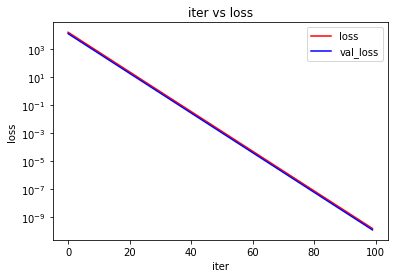

In [7]:
regr.plot_loss()

#### 【問題3】（アドバンス課題）バイアス項の除去
バイアス項 
θ
0
 を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。

In [33]:
#試し用のデータ
feature_value = ["A", "B", "C"]
target_value = ["Target"]
Bias = 10
T = [Bias + 12*i for i in range(1, 11)]
A = [[i for i in range(1, 11)]]
B = [[2*i for i in range(1, 11)]]
C = [[3*i for i in range(1, 11)]]
tmp1 = np.concatenate([A, B]).T
tmp2 = np.array(C).T
#tmp2 = np.concatenate([C, D]).T
target = pd.DataFrame(data=T, columns=target_value)
tmp3 = np.concatenate([tmp1, tmp2], axis=1)
feature = pd.DataFrame(data=tmp3, columns=feature_value)

train_feature, test_feature, train_target, test_target = train_test_split(feature, target, test_size=0.4, random_state=None)

In [34]:
#bias有り
regr_w_bias = cLinearRegression.ScratchLinearRegression(num_iter=500, lr=0.0003, bias=True, verbose=True)

In [35]:
#bias無し
regr_wo_bias = cLinearRegression.ScratchLinearRegression(num_iter=500, lr=0.0003, bias=False, verbose=True)

In [36]:
regr_w_bias.fit(train_feature.values, train_target.values, test_feature.values, test_target.values)

Initial theta:
[[6]
 [3]
 [7]
 [7]]
Theta:
[[5.81319156]
 [1.1874083 ]
 [3.3748166 ]
 [1.5622249 ]]
Feature:
[[ 1  1  1  1  1  1]
 [ 4  7  6  5  3 10]
 [ 8 14 12 10  6 20]
 [12 21 18 15  9 30]]
Target:
[[ 58  94  82  70  46 130]]
Result:
[[ 56.30805645  94.17920511  81.55548889  68.93177267  43.68434022
  132.05035378]]


In [37]:
regr_wo_bias.fit(train_feature.values, train_target.values, test_feature.values, test_target.values)

Initial theta:
[[5]
 [7]
 [9]]
Theta:
[[2.67781155]
 [2.3556231 ]
 [2.03343465]]
Feature:
[[ 4  7  6  5  3 10]
 [ 8 14 12 10  6 20]
 [12 21 18 15  9 30]]
Target:
[[ 58  94  82  70  46 130]]
Result:
[[ 53.95744681  94.42553191  80.93617021  67.44680851  40.46808511
  134.89361702]]


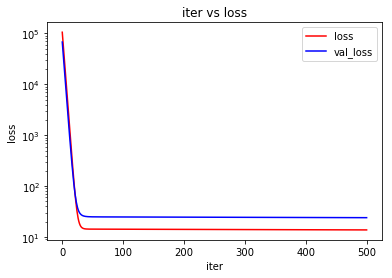

In [38]:
regr_w_bias.plot_loss()

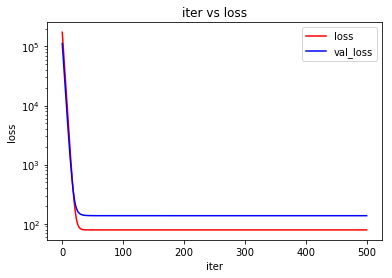

In [39]:
regr_wo_bias.plot_loss()

In [40]:
print(train_target.values)
regr_wo_bias.predict(train_feature.values)

[[ 58]
 [ 94]
 [ 82]
 [ 70]
 [ 46]
 [130]]


array([[ 53.95744681,  94.42553191,  80.93617021,  67.44680851,
         40.46808511, 134.89361702]])

#### 【問題4】（アドバンス課題）特徴量の多次元化
特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証してください。

In [22]:
#試し用のデータ
feature_value = ["A", "B", "C"]
target_value = ["Target"]
Bias = 10
T = np.random.randint(100, 1000, 10)
A = [[i for i in range(1, 11)]]
B = [[i for i in range(1, 11)]]
C = [[i for i in range(1, 11)]]
tmp1 = np.concatenate([A, B]).T
tmp2 = np.array(C).T
#tmp2 = np.concatenate([C, D]).T
target = pd.DataFrame(data=T, columns=target_value)
tmp3 = np.concatenate([tmp1, tmp2], axis=1)
feature = pd.DataFrame(data=tmp3, columns=feature_value)

train_feature, test_feature, train_target, test_target = train_test_split(feature, target, test_size=0.4, random_state=None)

In [25]:
#bias有り
regr_w_bias = cLinearRegression.ScratchLinearRegression(num_iter=500, lr=0.0003, bias=False, verbose=True)

In [26]:
regr_w_bias.fit(train_feature.values, train_target.values, test_feature.values, test_target.values)

Initial theta:
[[4]
 [7]
 [4]]
Theta:
[[26.59666117]
 [29.59666117]
 [26.59666117]]
Feature:
[[10  1  7  3  4  5]
 [10  1  7  3  4  5]
 [10  1  7  3  4  5]]
Target:
[[743 666 551 577 391 262]]
Result:
[[827.89983517  82.78998352 579.52988462 248.36995055 331.15993407
  413.94991759]]


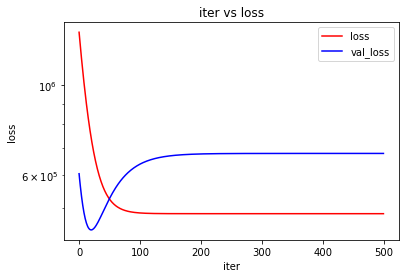

In [27]:
regr_w_bias.plot_loss()

#### 【問題5】（アドバンス課題）更新式の導出
最急降下法の更新式は以下でした。この式が導出される過程を説明してください。

線形回帰モデルでは、学習データから目的変数と（特徴量ベクトル * 係数ベクトルθ）のMSEが最小になるθを求めモデルを構築する。MSE最小になるθを求めるため最急降下法を用いる。  
最急降下法の勾配はMSEのθに対する微分で求められる。最急降下法の式は以下のように定義される。  
　　$ \theta_j = \theta_j - \frac{\partial}{\partial \theta_j} J(\theta) $   
$J(\theta)$はMSEなので、MSEを代入すると  
　　$ \theta_j = \theta_j - \alpha \times \frac{\partial}{\partial \theta_j} (\frac{1}{m}) \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 $  
となる。  
$(h_\theta(x^{(i)}) - y^{(i)})$を$T_i$と置いて式の微分部分を実行すると  
  
　　$ \frac{\partial h(\theta)}{\partial \theta_j} = \frac{\partial h(\theta)}{\partial T} \frac{\partial T(\theta)}{\partial \theta_j} $  
　　$ \frac{\partial h(\theta)}{\partial \theta_j}= 2(\frac{1}{m}) \sum_{i=1}^m T_i \frac{\partial h(\theta)}{\partial \theta}$  
ここで、$ \frac{\partial h(\theta)}{\partial \theta} $　は、$ \frac{\partial}{\partial \theta_j}(\theta_0*x_0 + \theta_1*x_1...\theta_j*x_j) = x_j$  
なので、最急降下法の式は、  
　　$ \theta_j = \theta_j - (\frac{\alpha}{m}) \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j $  
となる。

#### 【問題6】（アドバンス課題）局所最適解の問題
最急降下法には一般的に局所最適解の問題があります。しかし、線形回帰では学習を続ければ必ず最適解を求めることができます。それはなぜか数式やグラフを用いて説明してください。

線形回帰では、予測結果（モデル）と目的変数（入力データ）の差が最小になるθを各説明変数ベクトル毎に求めている。モデルとデータの差はMSE（モデルとデータの差の２乗）によって評価されるが線形回帰モデルでは予測結果は説明変数の１次式で表されるため、θに対してMSEをプロットすると必ず下に凸の２乗曲線になる。これは谷が１つのデータであるため最急降下法を用いると必ず最適解が求まる。

#### 【問題7】スクラッチで学べることは何か
最終発表時に以下の内容についてディスカッションを行います。自分なりの意見を用意しておいてください。
ライブラリを使うのではなくスクラッチでアルゴリズムを実装したことで学べたことは何か